# Task 1: Prediction using Supervised ML

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

 ### **GRIP @ Sparks Foundation**
 ### Author: Deepa Khatri 

### `Import Packages`

In [13]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

### `Load Data`

In [5]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

### `Basic Checks`

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.shape

(25, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

We checked our data, it's clean data. 

### `Exploratory Data Analysis`

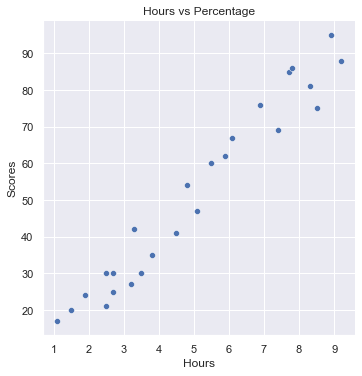

In [17]:
sns.relplot(x="Hours", y="Scores", data=data)
plt.title('Hours vs Percentage')
plt.show()

#### From the graph above we can see that there is a positive linear realtion between Hours and Scores.

E:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


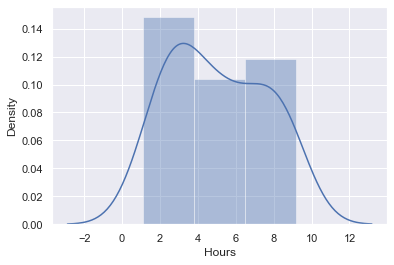

In [26]:
sns.distplot(data['Hours'])
plt.show()

#### Distribution of Hours.

E:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


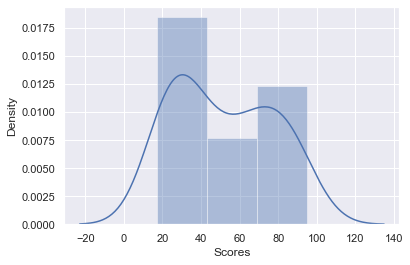

In [27]:
sns.distplot(data['Scores'])
plt.show()

#### Distrbution of Scores.

### `Preparing Data`

In [44]:
# define X and y
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

#### we define our target and independent variables next step, we have to split data for training and testing.

In [45]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### `Training the Algorithm`

In [46]:
from sklearn.linear_model import LinearRegression  
regression_model = LinearRegression()  
regression_model.fit(X_train, y_train) 

LinearRegression()

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

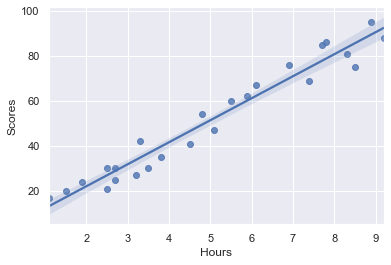

In [58]:
sns.regplot(x="Hours", y="Scores", data=data)
plt.show()

#### Plotted Regression Line

### `Making Predictions`

In [60]:
 # Predicting the scores
prediction_of_y = regression_model.predict(X_test)
print('Predicted')

Predicted


In [61]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': prediction_of_y})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if a student studies for 9.25 hrs/ day? 

In [68]:
study_hr = [[9.25]]
new_prediction = regression_model.predict(study_hr)
print("No of Hours = {}".format(study_hr))
print("Predicted Score = {}".format(new_prediction[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


### `Evaluating the model`

In [71]:
from sklearn import metrics  
from sklearn.metrics import accuracy_score, confusion_matrix
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, prediction_of_y)) 

Mean Absolute Error: 4.183859899002982


In [73]:
pd.crosstab(y_test, prediction_of_y)

col_0,16.884145,26.794801,33.732261,60.491033,75.357018
row_0,,,,,
20,1,0,0,0,0
27,0,0,1,0,0
30,0,1,0,0,0
62,0,0,0,1,0
69,0,0,0,0,1
